# Homework 10: Inference in SLR and MLR 
***

**Name**: Julia Troni

***

This assignment is due on Canvas by **6:00PM on Friday November 18**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

Here are some imports for this assignment:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import numpy as np 
from scipy import stats
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
%matplotlib inline


# Problem 1
***

The business of programming is exploding in growth! As a programmer, it is important to lead a well rounded life and take care of your health. We are going to look at a data set of a sample of programmers, their overall happiness and some possible influences on their happiness.

Load `happiness.csv` as a dataframe called `dfHappy` and take a look at the data.

In [2]:
# Read 'happiness.csv' into dfHappy
# Path to data 
file_path = 'happiness.csv'

# Load the data into a DataFrame 
dfHappy = pd.read_csv(file_path)

# Inspect some of the data
dfHappy.head(10)

,Index,happiness,grmsSgr,sunlight,screentime,BMI,ff
0,1,3.427723,52.984804,41.800653,148.656740,22.770203,53
1,2,5.381479,17.620582,83.681961,67.486945,18.965722,52
2,3,4.568705,33.145561,79.765209,83.085792,25.827328,48
3,4,1.560355,68.313223,39.734337,190.733508,19.102485,24
4,5,3.057388,53.587157,51.657807,113.854519,24.970149,2
5,6,0.727221,74.666532,14.594492,254.659872,25.115974,34
6,7,1.590356,62.672605,29.642536,176.756328,25.595235,34
7,8,4.258312,26.837312,79.765056,93.379803,23.654171,57
8,9,5.381398,18.659952,67.390751,52.556721,20.888795,48
9,10,5.890149,21.423596,98.044772,47.082464,27.589727,75


### Data description:

***Index***: This is just a number listing the ID of the programmer.

***happiness***: This is the measured happiness of the programmer on a scale from 0 to 7.

***grmsSgr***: This variable measures the grams of sugar intake per day.

***BMI***: This variable is the body mass index of the individual.

***screentime***: This variable measures the daily minutes of screentime that the programmer put in on a specified day. Some are low due to that day being a research, or field day, and some are high due to that day being a coding day.

***sunlight***: This variable measures the number of minutes taken during the day to be outdoors.

***ff***: This variable measures, on a scale from 0=none to 100=immediate, access to friends and family as a support system with the programmers particular job location. 

### What affects Happiness?

We are attempting to ascertain things that affect happiness. In problem 1 this will be done with Simple Linear Regression.

Determine the affect of each predictor variable in $\color{red}{\textbf{5 steps}}$: 

$\color{red}{\textbf{1]}}$: Make a scatter plot of predictor variable versus response variable. 

$\color{red}{\textbf{2]}}$: Come up with the regression line for the relationship.

Create the same scatterplot (from Step 1) with the line of best-fit imposed on it, $\textbf{AND}$ print the actual equation along with each graph.

That is, fit and $\textbf{print}$ a linear regression model to the data of the form 

$$
Y_i = \alpha + \beta x_i \quad \textrm{for } i=1,2, \ldots, 498 
$$

$\color{red}{\textbf{3]}}$: Find a measure for the goodness of fit of the regression line.

Explain what $R^2$ means in this case.

$\color{red}{\textbf{4]}}$: Create a $99\%$ confidence interval for the slope ($\beta$) of the regression line.

From step 2, notice the $\beta$ for the happiness relationship with sugar.

Explain your results: Is your $\beta$ statistic in the confidence interval? Is 0 included in the interval? 


$\color{red}{\textbf{5]}}$: For the relationship that you think you have discovered, the question is whether its really the case or if the downward/upward trend should be attributed to chance.

Perform a hypothesis test at the $\alpha = 0.01$ significance level to determine if the observed relationship between the predictor and the response is real by testing the hypotheses: 

$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$

$\color{blue}{\text{Explain your results}}$: Is there sufficient evidence to conclude that the observed relationship between the predictor and the response happiness is real? Answer with a p-value argument. Complete each step even if you find no legitimate linear relationship between variables. So, your answer ($\color{blue}{\text{p-value argument}}$) should take into account that we ARE making (without checking) the assumptions below:


### Assumptions

To begin with, we will assume all the $\color{blue}{\text{proper conditions}}$ for doing inference on slope:

-- $\color{blue}{\text{Linear}}$: The relationship between the independent variable and the dependent variable is linear.

-- $\color{blue}{\text{Independence}}$: The noise/errors are independent.

-- $\color{blue}{\text{Normal}}$: The errors are normally distributed.

-- $\color{blue}{\text{Equal Variance}}$: Homoscedastic errors.

-- $\color{blue}{\text{Random}}$: Random errors; unbiased.


### Here are some hints/formulas that may help you:

You may want to use `.max()` and `.min()` in order to find appropriate bounds for each scatterplot.

You may want to do some calculations without using canned functions. Here are some useful formulas:

$\hat{y}=\hat{a}+\hat{b}\cdot x$

$SSE = \sum{(y-\hat{y})^2}$

$\hat{\sigma^2} = \frac{SSE}{n-2}$

$SE_{\beta}=\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}$

$t_{\hat{\beta}}=\frac{\hat{\beta}-\beta}{\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}}$

$\text{p-value} = 2\cdot \text{CDF}(t_{\hat{\beta}}, n-2)$

$\color{blue}{\text{(25 points) }}$ ***Perform the $\color{red}{\text{5-steps}}$ mentioned above for $\textbf{EACH}$ predictor variable.*** 

***Complete each of the 5 steps mentioned above with a title (such as those below, but replace the question mark of course) and also create any extra needed cells for coding and explanations.***



### Step 1.


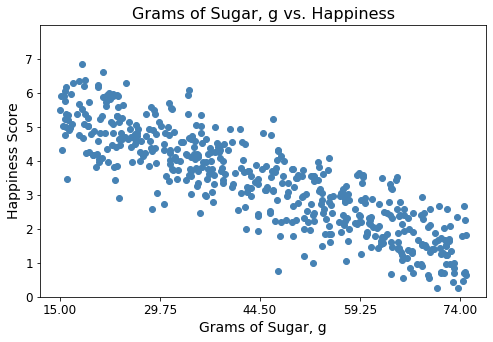

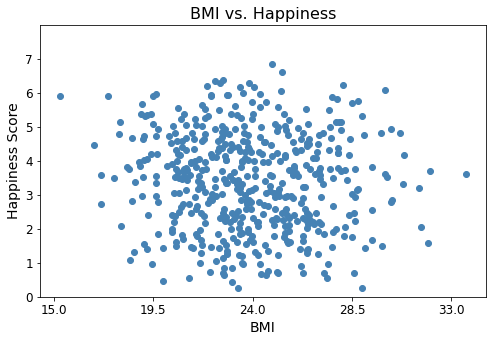

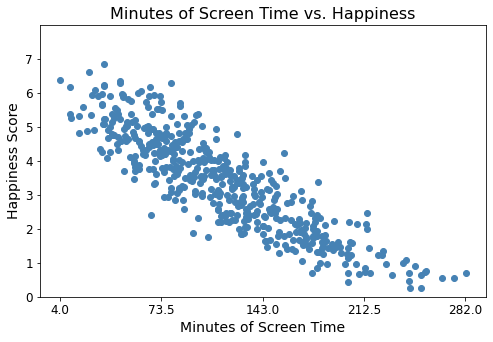

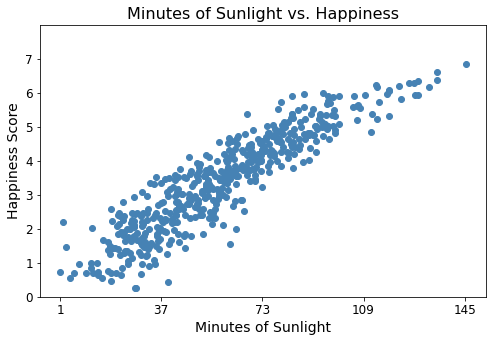

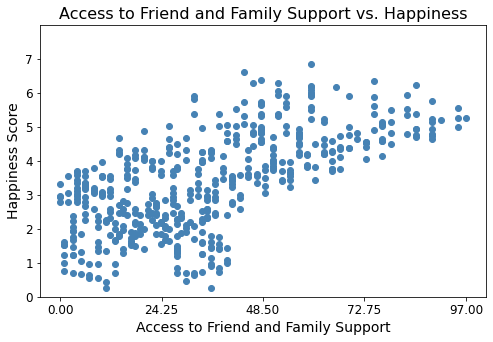

In [3]:
#1] : Function to Make a scatter plot of predictor variable x, versus response variable y, 
    # with the predictor name xname.
def Step1(x,y,xname):
    
    # Initialize the figure.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    
    # Create a scatter plot of predictor 'x' and response'y'.
    ax.scatter(x, y, color="steelblue")

    # Make the graph pretty.
    ax.set_ylim([0,8]);
    plt.xticks(np.linspace(int(x.min()),int(x.max()),5), fontsize=12)
    plt.yticks(np.linspace(0,7,8), fontsize=12);
    ax.set_xlabel(xname, fontsize=14)
    ax.set_ylabel("Happiness Score", fontsize=14);
    ax.set_title(xname + " vs. Happiness", fontsize=16)

    
    
Step1(dfHappy["grmsSgr"], dfHappy["happiness"], "Grams of Sugar, g")
Step1(dfHappy["BMI"], dfHappy["happiness"], "BMI")
Step1(dfHappy["screentime"], dfHappy["happiness"], "Minutes of Screen Time")
Step1(dfHappy["sunlight"], dfHappy["happiness"], "Minutes of Sunlight")
Step1(dfHappy["ff"], dfHappy["happiness"], "Access to Friend and Family Support")


###  Step2.


$\color{red}{\textbf{2]}}$: Come up with the regression line for the relationship.

Create the same scatterplot (from Step 1) with the line of best-fit imposed on it, $\textbf{AND}$ print the actual equation along with each graph.

That is, fit and $\textbf{print}$ a linear regression model to the data of the form 

$$
Y_i = \alpha + \beta x_i \quad \textrm{for } i=1,2, \ldots, 498 
$$


In [4]:
# This function will Come up with the regression line for the relationship.
#Create the same scatterplot (from Step 1) with the line of best-fit imposed on it,  
#𝐀𝐍𝐃  print the actual equation along with each grap
def Step2(x,y,xname="Xname"):
    
    # Initialize the figure.
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    
    # Create a scatter plot of predictor 'x' and response'y'.
    ax.scatter(x, y, color="steelblue")

    # Make the graph pretty.
    ax.set_ylim([0,8]);
    plt.xticks(np.linspace(int(x.min()),int(x.max()),5), fontsize=12)
    plt.yticks(np.linspace(0,7,8), fontsize=12);
    ax.set_xlabel(xname, fontsize=16)
    ax.set_ylabel("Happiness Score", fontsize=16);
    ax.set_title(xname + " vs. Happiness")
    
    # Generate the 5 returns from .linregress on 'x' and 'y'.
    bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
    
    # Plot the regression line, i.e. the line of best fit.
    ax.plot(x, ahat + bhat*x, color="steelblue", lw=3);
    
    print("The regression equation (line of best fit) is: Y = {:.5f} + {:.5f}x".format(ahat, bhat))
    print("The slope is {:.4f}".format(bhat))
    print("The y intercept is {:.4f}".format(ahat))


### Grams of Sugar

The regression equation (line of best fit) is: Y = 6.58116 + -0.07138x
The slope is -0.0714
The y intercept is 6.5812


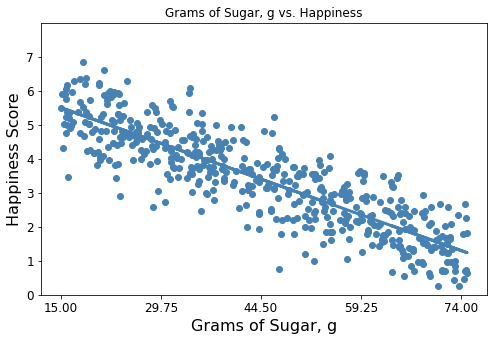

In [5]:
    
Step2(dfHappy["grmsSgr"], dfHappy["happiness"], "Grams of Sugar, g")


The regression equation (line of best fit) is: Y = 4.26156 + -0.03641x
The slope is -0.0364
The y intercept is 4.2616


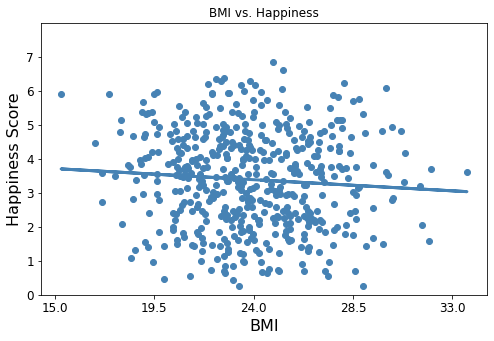

In [6]:
Step2(dfHappy["BMI"], dfHappy["happiness"], "BMI")


### Screentime

The regression equation (line of best fit) is: Y = 6.04112 + -0.02306x
The slope is -0.0231
The y intercept is 6.0411


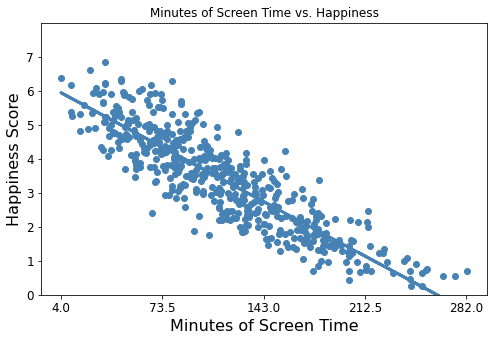

In [7]:
Step2(dfHappy["screentime"], dfHappy["happiness"], "Minutes of Screen Time")


### Sunlight

The regression equation (line of best fit) is: Y = 0.57330 + 0.04828x
The slope is 0.0483
The y intercept is 0.5733


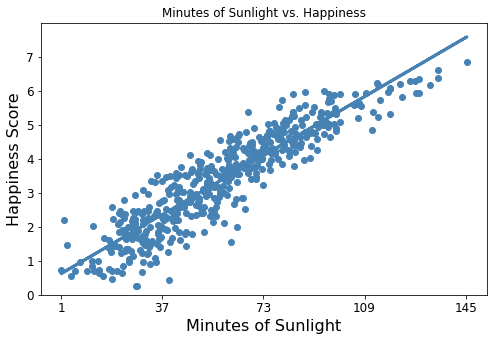

In [8]:
Step2(dfHappy["sunlight"], dfHappy["happiness"], "Minutes of Sunlight")

### Access to Friend and Family Support

The regression equation (line of best fit) is: Y = 1.96365 + 0.04000x
The slope is 0.0400
The y intercept is 1.9636


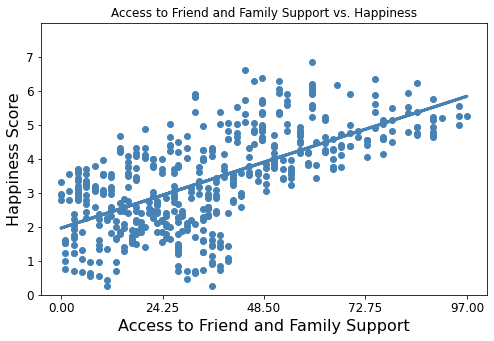

In [9]:

Step2(dfHappy["ff"], dfHappy["happiness"], "Access to Friend and Family Support")

### Step3.


$\color{red}{\textbf{3]}}$: Find a measure for the goodness of fit of the regression line.

Explain what $R^2$ means in this case.

In [10]:
# Find a measure for the goodness of fit of the regression line.
def Step3(x,y,xname="Xname"):
    
    
    # Generate the 5 returns from .linregress on 'x' and 'y'.
    bhat, ahat, rval, pval, stderr = stats.linregress(x, y)
        #bhat is slope of regression line
        # ahat is y-intercept
        # rval is correlation coefficient
        # pval is the p-value for slope
        # stderr is the standard error for slope CI
        
    print("______________{}__________________________".format(xname))
    print("correlation coefficient r = {:.4f}".format(rval)) 
    print("R^2 value: {:.4f}".format(rval**2))
    print("This means that {:.4f}% of the data points fall on the regression line".format(rval**2*100))
    return bhat, ahat, rval, pval, stderr 


In [11]:
    
bhat_Sugar, ahat_Sugar, rval_Sugar, pval_Sugar, stderr_Sugar = Step3(dfHappy["grmsSgr"], 
                                                                     dfHappy["happiness"], "Grams of Sugar, g")
bhat_BMI, ahat_BMI, rval_BMI, pval_BMI, stderr_BMI = Step3(dfHappy["BMI"], 
                                                           dfHappy["happiness"], "BMI")
bhat_Screen, ahat_Screen, rval_Screen, pval_Screen, stderr_Screen = Step3(dfHappy["screentime"], 
                                                                          dfHappy["happiness"], "Minutes of Screen Time")
bhat_Sun, ahat_Sun, rval_Sun, pval_Sun, stderr_Sun= Step3(dfHappy["sunlight"],
                                                          dfHappy["happiness"], "Minutes of Sunlight")
bhat_ff, ahat_ff, rval_ff, pval_ff, stderr_ff= Step3(dfHappy["ff"], 
                                                     dfHappy["happiness"], "Access to Friend and Family Support")

______________Grams of Sugar, g__________________________
correlation coefficient r = -0.8656
R^2 value: 0.7492
This means that 74.9188% of the data points fall on the regression line
______________BMI__________________________
correlation coefficient r = -0.0757
R^2 value: 0.0057
This means that 0.5732% of the data points fall on the regression line
______________Minutes of Screen Time__________________________
correlation coefficient r = -0.8750
R^2 value: 0.7657
This means that 76.5704% of the data points fall on the regression line
______________Minutes of Sunlight__________________________
correlation coefficient r = 0.9133
R^2 value: 0.8340
This means that 83.4043% of the data points fall on the regression line
______________Access to Friend and Family Support__________________________
correlation coefficient r = 0.6437
R^2 value: 0.4144
This means that 41.4399% of the data points fall on the regression line




The correlation coefficient, $r$, measures the linear dependence, or the the linear correlation, between $x$ and $y$.

$R^2$ is coefficent of determination, which measures the proportion of variation in the dependent variable, $y$, that can be attributed to the independet variable, $x$. In other words, it shows the strength of relationshop between the model and dependent variable $x$ on 0-100% scale. $R^2$ can be used to help quantify how well the model fits the data, however you fist must assess the residual plots 

Since we are assuming the assumptions have been met, we can look at how larger or small the $R^2$ is to find the strongest relationship. Here we see the $r$ and $R^2$ is the largest for minutes of sunlight. That suggests that the relationship between minutes of sunlight and happiness is the strongest. 

In contrast, the relationship between BMI and happiness can most likely be ignored sign there is not a significant relationship between the two since the correlation coefficient and $R^2$ values are very small

### Step4.
$\color{red}{\textbf{4]}}$: Create a $99\%$ confidence interval for the slope ($\beta$) of the regression line.

From step 2, notice the $\beta$ for the happiness relationship with sugar.

Explain your results: Is your $\beta$ statistic in the confidence interval? Is 0 included in the interval? 



In [12]:
#creates a 99% confidence interval given 
    # stander error stderr
    # and slope of the regression line, bhat
def Step4(bhat, stderr):
    
    criticalval= stats.t.ppf(1-0.01/2,len(dfHappy)-2)
    high= bhat+ criticalval*stderr
    low= bhat- criticalval*stderr
    print("Bhat (𝛽)  is {:.4f}".format(bhat))
    CI=low,high
    print("The 99% confidence interval is ", CI)
    if (bhat > low) and (bhat < high):
        print("YES! the slope ( 𝛽 ) of the regression line IS in the confidence interval")
    else:
        print("NO the slope ( 𝛽 ) of the regression line IS NOT in the confidence interval")

#### Predictor Variable = Grams of Sugar

In [13]:
Step4(bhat_Sugar, stderr_Sugar)

Bhat (𝛽)  is -0.0714
The 99% confidence interval is  (-0.0761711072791075, -0.06658124235788959)
YES! the slope ( 𝛽 ) of the regression line IS in the confidence interval


Since the slope is in the 99% CI and the CI does not contain 0, we can conclude with 99% confidence that conclude with 99% confidence that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between grams of sugar and happiness is real

#### Predictor Variable = BMI

In [14]:
Step4(bhat_BMI, stderr_BMI)

Bhat (𝛽)  is -0.0364
The 99% confidence interval is  (-0.09208781463181609, 0.019264943301827223)
YES! the slope ( 𝛽 ) of the regression line IS in the confidence interval


Since the slope is in the 99% CI, HOWEVER the CI does not contain 0, so there is NOT sufficient statistical evidence that $\beta \neq 0$ and we CANNOT conclude that grams of sugar and happiness has a significant linear relationship 

#### Predictor Variable = Screentime

In [15]:
Step4(bhat_Screen, stderr_Screen)

Bhat (𝛽)  is -0.0231
The 99% confidence interval is  (-0.024544905344008536, -0.02158239417069866)
YES! the slope ( 𝛽 ) of the regression line IS in the confidence interval


Since the slope is in the 99% CI and the CI does not contain 0, we can conclude with 99% confidence that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between minutes of screen time and happiness  is real

#### Predictor Variable = Sunlight

In [16]:
Step4(bhat_Sun, stderr_Sun)

Bhat (𝛽)  is 0.0483
The 99% confidence interval is  (0.04577602096156716, 0.05077656727655798)
YES! the slope ( 𝛽 ) of the regression line IS in the confidence interval


Since the slope is in the 99% CI and the CI does not contain 0, we can conclude with 99% confidence that $\beta \neq 0$ and  minutes of sunlight and happiness has a significant linear relationship 

#### Predictor Variable = Access to Friend and Family Support 

In [17]:
Step4(bhat_ff, stderr_ff)

Bhat (𝛽)  is 0.0400
The 99% confidence interval is  (0.034480580161586144, 0.04552262349865638)
YES! the slope ( 𝛽 ) of the regression line IS in the confidence interval


Since the slope is in the 99% CI and the CI does not contain 0, we can conclude with 99% confidence that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between gAccess to Friend and Family Support and happiness is real

###  Step5.


$\color{red}{\textbf{5]}}$: For the relationship that you think you have discovered, the question is whether its really the case or if the downward/upward trend should be attributed to chance.

Perform a hypothesis test at the $\alpha = 0.01$ significance level to determine if the observed relationship between the predictor and the response is real by testing the hypotheses: 

$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$

$\color{blue}{\text{Explain your results}}$: Is there sufficient evidence to conclude that the observed relationship between the predictor and the response happiness is real? Answer with a p-value argument. Complete each step even if you find no legitimate linear relationship between variables. So, your answer ($\color{blue}{\text{p-value argument}}$) should take into account that we ARE making (without checking) the assumptions below:

In [18]:
#Function perform hypothesis test at alpha=0.01 
    # bhat is slope of regression line 
    #stderr is standard error 
#note: all input parameters I will be using are returned from lingress found above
def Step5(bhat, stderr):
    #calculate test statistic
    ts= (bhat - 0)/stderr
    #calculate p value
    if (bhat >0):
        p=2*(1-stats.t.cdf(ts,df=len(dfHappy)-2))
    else:
        p=2*(stats.t.cdf(ts,df=len(dfHappy)-2))

    print("test statistic T is {}".format(ts))
    print("The slope (𝛽)  is {:.4f}".format(bhat))
    print("pval = ", p)
    #compare pvalue to alpha
    if (p < 0.01):
        print("The p-value is less than 𝛼=0.01. Sufficient evidence to reject null hypothesis")
    else:
        print("Fail to reject null")


#### Predictor Variable = Grams of SUgar

In [19]:
Step5(bhat_Sugar , stderr_Sugar)

test statistic T is -38.491245353793545
The slope (𝛽)  is -0.0714
pval =  4.5167037984356374e-151
The p-value is less than 𝛼=0.01. Sufficient evidence to reject null hypothesis


Since the p-value for grams of sugar is less than $\alpha = 0.01$ we reject the null hypothesis and conclude that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between grams of sugar and happiness is real

Increasing sugar intake is correlated with lower happiness levels.
The slope was -0.0713 so every additional gram of sugar consumed, results in a reduction of -0.0713 happiness points. This is not a very significant affect however it is the strongest affect out of any of the other variables studied here. 

#### Predictor Variable = BMI 

In [20]:
Step5(bhat_BMI, stderr_BMI)

test statistic T is -1.6910560715471123
The slope (𝛽)  is -0.0364
pval =  0.09145428934378726
Fail to reject null


Since the p-value for BMI is GREATER than $\alpha = 0.01$ we FAIL to reject the null hypothesis and cannot conclude that the relationship between BMI and happiness is real

#### Predictor Variable = Screentime

In [21]:
Step5(bhat_Screen, stderr_Screen)

test statistic T is -40.26143223830383
The slope (𝛽)  is -0.0231
pval =  2.0570033369948355e-158
The p-value is less than 𝛼=0.01. Sufficient evidence to reject null hypothesis


Since the p-value for minutes of screen time is less than $\alpha = 0.01$ we reject the null hypothesis and conclude that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between minutes of screen time and happiness is real

Increasing screentime is correlated with lower happiness levels.
The slope was -0.0231 so every additional minute of screentime, results in a reduction of -0.0231 happiness points. Not a very strong affect

#### Predictor Variable = Sunlight

In [22]:
Step5(bhat_Sun, stderr_Sun)

test statistic T is 49.927250880494924
The slope (𝛽)  is 0.0483
pval =  0.0
The p-value is less than 𝛼=0.01. Sufficient evidence to reject null hypothesis


Since the p-value for grams of sugar is less than $\alpha = 0.01$ we reject the null hypothesis and conclude that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between minutes of sunlight and happiness is real

Increasing minutes of sunlight is correlated with higher happiness levels.
The slope was 0.0483 so every additional minute of sunlight recieved, results in an increase of 0.0483 happiness points.

#### Predictor Variable = Access to Friend and Family Support 

In [23]:
Step5(bhat_ff, stderr_ff)

test statistic T is 18.734802459537597
The slope (𝛽)  is 0.0400
pval =  0.0
The p-value is less than 𝛼=0.01. Sufficient evidence to reject null hypothesis


Since the p-value for grams of sugar is less than $\alpha = 0.01$ we reject the null hypothesis and conclude that there is sufficient statistical evidence that $\beta \neq 0$ and the relationship between  access to friends and family as a support system  and happiness is real

Increased access to friends and family as a support system is correlated with higher happiness levels.
The slope was 0.0400 so every 1 point increase in access to friends and family as a support system results in an increase of 0.0400 happiness points.

# Problem 2

Instead of looking at each individual predictor, fit a multiple linear regression model to the happiness data.

## Part A

***(4 points)*** Use `model = sm.OLS(y, X).fit()` to find the estimated parameters and based on these parameters estimated by the model, replace the unknown $\hat{\beta}_j$ parameters below with the actual values in the model.

$$
\texttt{happiness} = \text{constant} + \beta_{sugar} \times \texttt{grmsSgr} + \beta_{BMI} \times \texttt{BMI} + \beta_{screen} \times \texttt{screentime} + \beta_{sun}\times \texttt{sunlight} + \beta_{ff}\times \texttt{ff}
$$


In [24]:
# Code here:
# Collect the features (independent variables) in a 2D array. 
X = dfHappy[["grmsSgr", "sunlight","screentime", "BMI", "ff"]]

# Add a constant to the 'X' array for the intecept. 
X = sm.add_constant(X)

# Collect the response (Dependent variable) data in an array.
y = dfHappy["happiness"]

# Fit the ordinary least-squares (OLS) model.
# These are the coefficients for the MLR model.
MLRmodel = sm.OLS(y, X).fit()

print(MLRmodel.params)

const         4.027108
grmsSgr      -0.021068
sunlight      0.022160
screentime   -0.008401
BMI          -0.007613
ff            0.004445
dtype: float64


C:\Users\julia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


$\color{red}{\text{Solution for Part A, the model is...:}}$

$
\texttt{happiness} = \text{4.027} - 0.0211 \times \texttt{grmsSgr} -0.0076 \times \texttt{BMI} -0.0084 \times \texttt{screentime} + 0.0222\times \texttt{sunlight} +  0.0044\times \texttt{ff}
$

### Part B

***(3 points)*** According to a p-value argument, should we discard any predictor variables?

To answer this, run `model.summary()` to check the validity of your $\beta_j$ coefficients, i.e. check to see if a given predictor variable can be eliminated from the model due to its non-relationship with the response variable, and name that variable in your solution.

In [25]:
# Code here:
# call for a summary of the MLR model
MLRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1310.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.20e-281
Time:                        17:38:17   Log-Likelihood:                -222.53
No. Observations:                 498   AIC:                             457.1
Df Residuals:                     492   BIC:                             482.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0271      0.201     20.044      0.000       3.632       4.422
grmsSgr       -0.0211      0.002    -12.261      0.000      -0.024      -0.018
sunlight       0.0222      0.001     18.485      0.000       0.020       0.025
screentime    -0.0084      0.001    -15.680      0.000      -0.009      -0.007
BMI           -0.0076      0.006     -1.323      0.186      -0.019       0.004
ff             0.0044      0.001      4.672      0.000       0.003       0.006
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.155
Skew:                          -0.026   Prob(JB):                        0.926
Kurtosis:                       3.069   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\color{red}{\text{Solution for Part B:}}$


We can discard BMI from the model due to its non-relationship with the response variable. This is because the p value = 0.186 which is significant

In [26]:
# Code here:
# Collect the features (independent variables) in a 2D array. 
J = dfHappy[["grmsSgr", "sunlight","screentime", "ff"]]

# Add a constant to the 'X' array for the intecept. 
J = sm.add_constant(J)

# Collect the response (Dependent variable) data in an array.
y = dfHappy["happiness"]

# Fit the ordinary least-squares (OLS) model.
# These are the coefficients for the MLR model.
MLRmodel = sm.OLS(y, J).fit()

print(MLRmodel.params)

const         3.841546
grmsSgr      -0.021160
sunlight      0.022211
screentime   -0.008365
ff            0.004474
dtype: float64


C:\Users\julia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The updated model, without BMI is

$
\texttt{happiness} = \text{3.841} - 0.0211 \times \texttt{grmsSgr} -0.0084 \times \texttt{screentime} + 0.0222\times \texttt{sunlight} +  0.0044\times \texttt{ff}
$

### Part C

***(3 points)*** Which two variables have the strongest influence on happiness?

$\color{red}{\text{Solution for Part C:}}$


It appears that grams of sugar and sunlight have the strongest influence on happiness since the coefficients for these variables are the two furthest from 0. 
That is,

$
\texttt{coeff grmsSgr} = - 0.0211$

$ \texttt{coeff sunlight}= 0.0222$

### Part D

***(6 points)*** Find any colinearity issues in this model and create three graphs for the three biggest offending variables to get a visual of the colinearity.

In [27]:
# we already discarded BMI so find colinearity among the remaining variables
dfHappy[["grmsSgr", "sunlight","screentime", "ff"]].corr()

,grmsSgr,sunlight,screentime,ff
grmsSgr,1.000000,-0.788105,0.749181,-0.556069
sunlight,-0.788105,1.000000,-0.777234,0.613576
screentime,0.749181,-0.777234,1.000000,-0.539554
ff,-0.556069,0.613576,-0.539554,1.000000


From calling .corr() we can see that grams of sugar and sunlight have a the strongest correlation, and it is a strong negative correlation since the correlation coefficient is -0.788. 

Second, sunlight and screen time has the next strongest correlation. That is with a correlation coefficent of -0.777, thus a strong negative correlation.

Lastly, screen time and grams of sugar have the 3rd largest correlation. The correlation coefficent of 0.749 shows a strong positive relationship. 

Text(0.5, 1.0, 'grmsSgr vs. screentime')

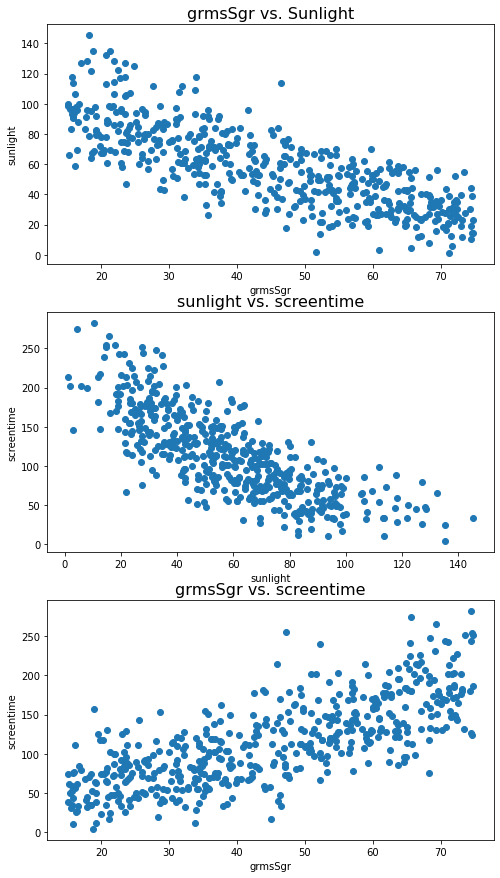

In [28]:
fig, axes= plt.subplots(nrows=3, ncols=1, figsize=(8,15))

axes[0].scatter(dfHappy["grmsSgr"], dfHappy["sunlight"])
axes[0].set_xlabel("grmsSgr")
axes[0].set_ylabel("sunlight");
axes[0].set_title("grmsSgr vs. Sunlight", fontsize=16)

axes[1].scatter(dfHappy["sunlight"], dfHappy["screentime"])
axes[1].set_xlabel("sunlight")
axes[1].set_ylabel("screentime");
axes[1].set_title("sunlight vs. screentime", fontsize=16)

axes[2].scatter(dfHappy["grmsSgr"], dfHappy["screentime"])
axes[2].set_xlabel("grmsSgr")
axes[2].set_ylabel("screentime");
axes[2].set_title("grmsSgr vs. screentime", fontsize=16)

### Part E

***(4 points)*** Simplify the model by eliminating variables with colinearity. Choose one variable with the strongest affect on happiness and provide an SLR model. What would the linear regression model be?

From our analysis above we can eliminate grams of sugar and screentime due to colinearity. Then of the remaining sunlight and ff variables, we conclude that sunlight has a stronger affect on happiness since the slope is larger 

The regression equation (line of best fit) is: Y = 0.57330 + 0.04828x
The slope is 0.0483
The y intercept is 0.5733


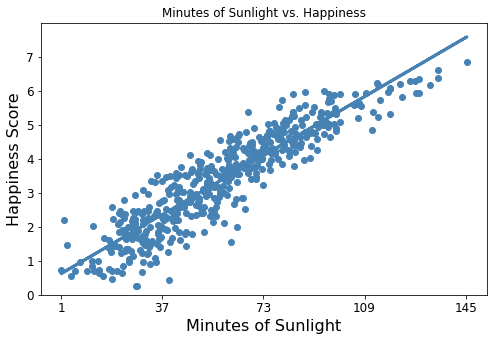

In [29]:
#creating SLR of Sunlight vs happiness since we determined this has the strongest affect on happiness
#using the function from step 2 that uses lingress
Step2(dfHappy["sunlight"], dfHappy["happiness"], "Minutes of Sunlight")

Thus the final SLR model for the strongest affector of happiness is for sunlight

$\texttt{happiness} =0.57330 + 0.04828\times \texttt{sunlight} $

### Rubric Check
***
***(5 points)*** Make sure your answers are thorough but not redundant. Explain your answers, don't just put a number. Make sure you have matched your questions on Gradescope. Make sure your PDF is correct and your LaTeX is correct. etc. etc. BE NEAT.

***
# End of assignment
***

# OPTIONAL (Just for fun)

*** $\color{red}{\text{No work to be done here}}$. This is just some code to play with if you are interested.***

                            OLS Regression Results                            
Dep. Variable:               sunlight   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2493.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.42e-195
Time:                        17:38:17   Log-Likelihood:                -1902.2
No. Observations:                 498   AIC:                             3808.
Df Residuals:                     496   BIC:                             3817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2119      1.274     -0.166      0.8

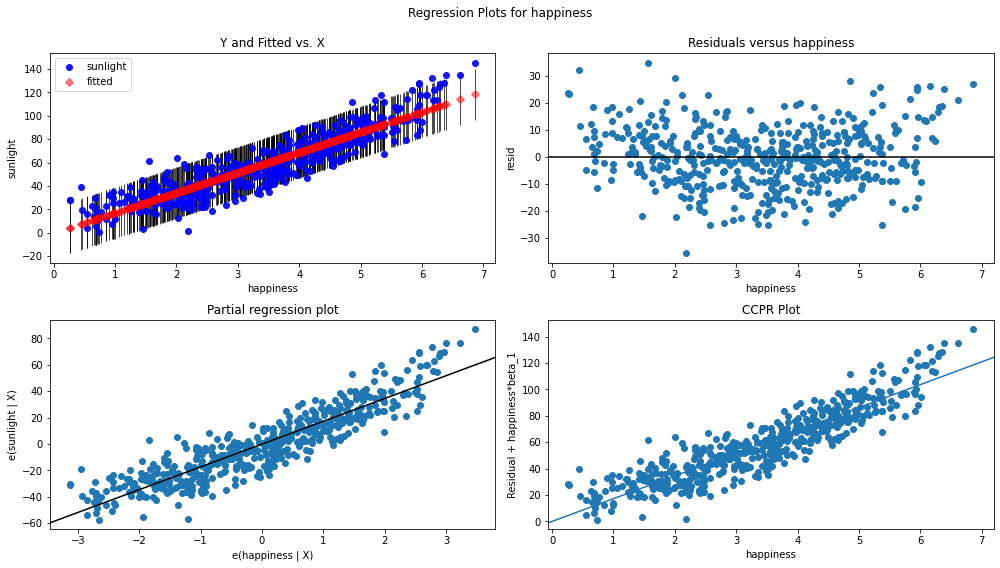

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# fit simple linear regression model
linear_model = ols('sunlight ~ happiness',
                   data=dfHappy).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'happiness',
                                    fig=fig)